## exe-1) 유방암 양성/음성 여부 판단을 위한 모델 선정

In [231]:
### 5시 40분까지 제출 : 파일명 끝에 본인 이름
##### - 구글드라이브>산출물>머신러닝>03_유방암_판별모델생성
##### (모든 모델 확인 후 합당한 모델 선정한 [해석] 포함)

In [232]:
### 유방암 양성/음성 여부 판단 사용 가능 모델
### 1. K-최근접이웃(KNN, 이웃값 조정)
### 2. 로지스틱 회귀분류(이진분류)
### 3. 확률적 경사 하강법(SGD)
### 4. 결정트리
### 5. 앙상블모델

## 기본 라이브러리 설정

In [233]:
## 1. 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. 훈련 검증용 데이터 분리
from sklearn.model_selection import train_test_split

# 3. 교차검증
from sklearn.model_selection import cross_validate

# 4. 정규화
from sklearn.preprocessing import StandardScaler

# 5. 분류모델 구축
# 1) ★K-최근접이웃(KNN, 이웃값 조정)
from sklearn.neighbors import KNeighborsClassifier 
# 2) ★로지스틱 회귀모델
from sklearn.linear_model import LogisticRegression 
# 3) 확률적 경사 하강법
from sklearn.linear_model import SGDClassifier 
# 4) 결정트리
from sklearn.tree import DecisionTreeClassifier
# 5) 앙상블 모델
from sklearn.ensemble import RandomForestClassifier # ★랜덤포레스트
from sklearn.ensemble import ExtraTreesClassifier # 엑스트라 트리
from sklearn.ensemble import GradientBoostingClassifier # ★그레디언트 부스팅
from sklearn.ensemble import HistGradientBoostingClassifier # ★히스토그램 기반 그레디언트 부스팅

from xgboost import XGBClassifier # xgboost
from lightgbm import LGBMClassifier # lightgbm

### 1. 데이터 불러오기

In [234]:
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer()

In [235]:
breast_cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [236]:
breast_cancer_data["feature_names"]
"""     
- radius 반경
- texture 질감
- perimeter 둘레
- area  면적
- smoothness  매끄러움
- compactness  조그만 정도
- concavity  오목함
- concave points  오목함 점의수
- symmetry  대칭
- fractal dimension 프렉탈 차원
"""

'     \n- radius 반경\n- texture 질감\n- perimeter 둘레\n- area  면적\n- smoothness  매끄러움\n- compactness  조그만 정도\n- concavity  오목함\n- concave points  오목함 점의수\n- symmetry  대칭\n- fractal dimension 프렉탈 차원\n'

In [237]:
df = pd.DataFrame(data=breast_cancer_data["data"], columns=breast_cancer_data["feature_names"])
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [238]:
breast_cancer_data["target_names"]
# 'malignant' : 음성(0), 'benign' : 양성(1)
breast_cancer_data["target"].shape

(569,)

In [239]:
df["target"] = breast_cancer_data["target"]
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [240]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


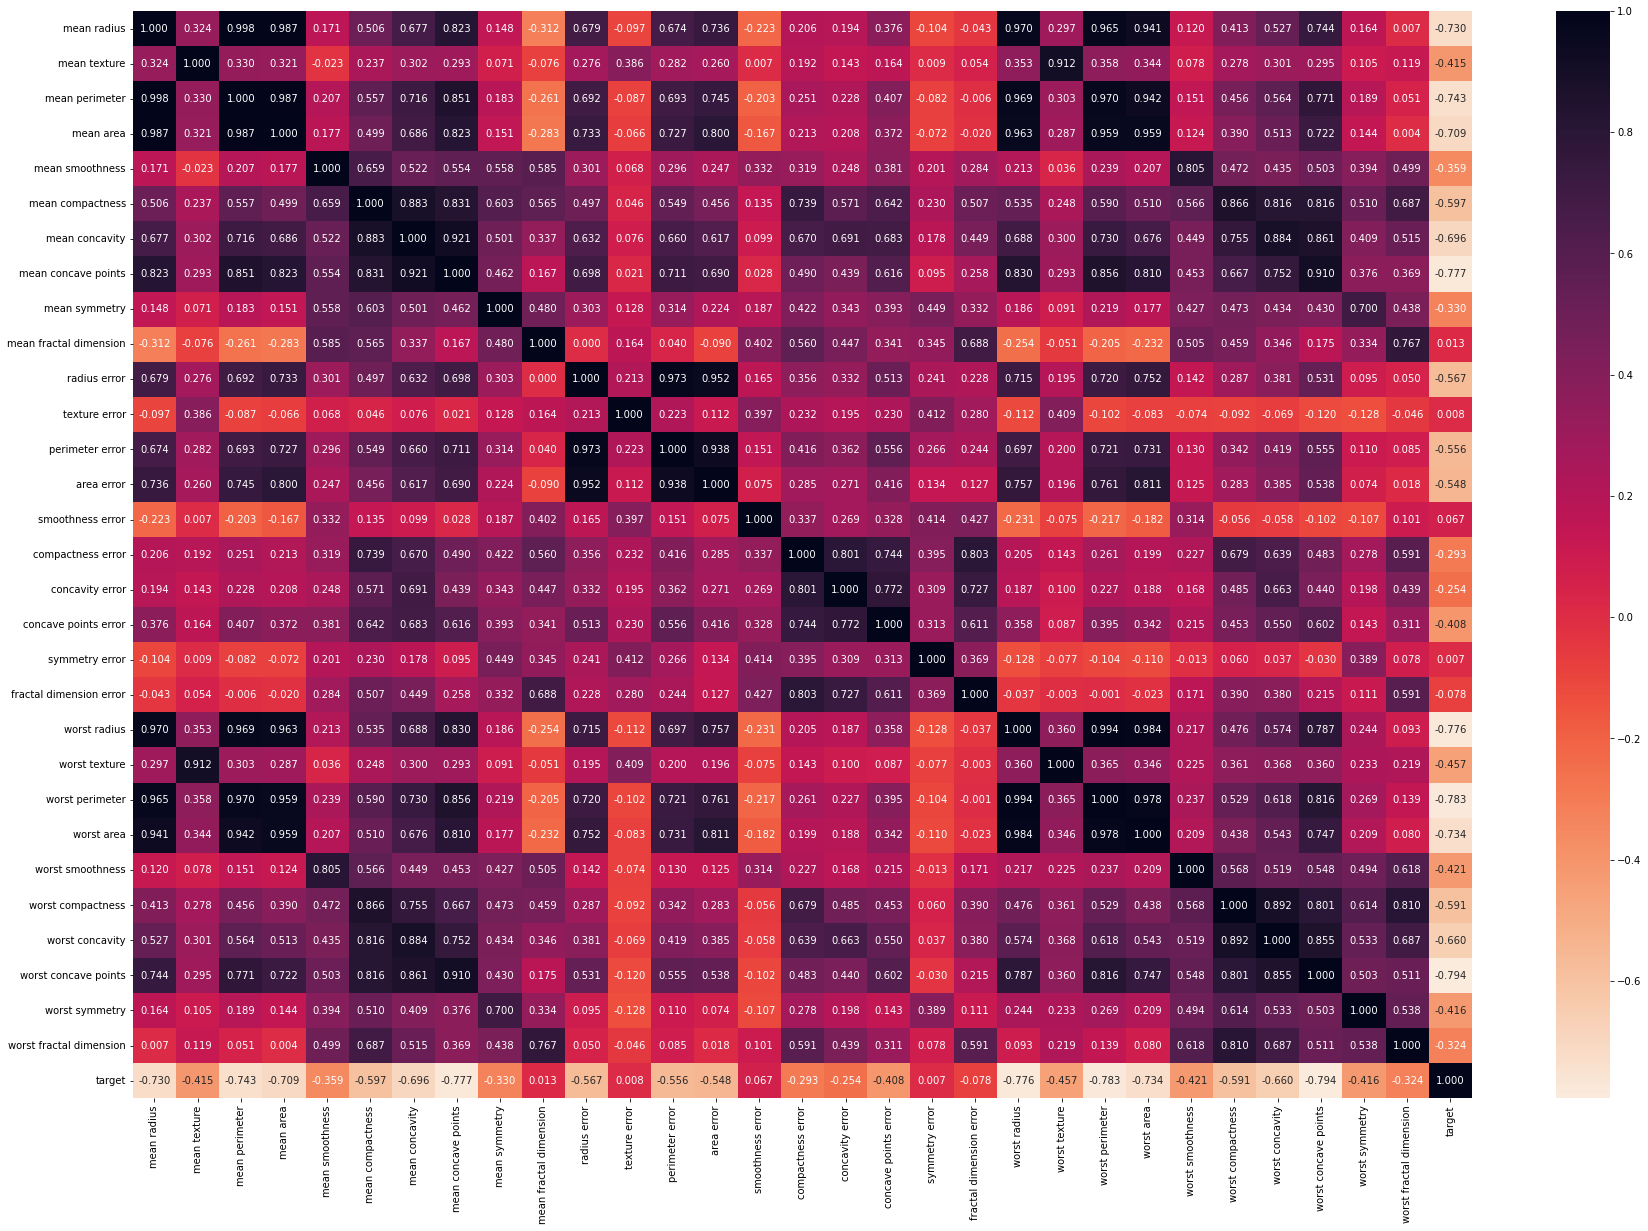

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (30,20))
sns.heatmap(df.corr(), annot=True, fmt = '.3f', cmap='rocket_r')
plt.show()

### 2. 데이터 전처리

In [242]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [243]:
# 독립변수 data
data = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']].to_numpy()

# data = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
#        'mean smoothness', 'mean compactness', 'mean concavity',
#        'mean concave points', 'mean symmetry', 'mean fractal dimension']].to_numpy()

# data = df[['mean radius', 'mean perimeter', 'mean area',
#             'mean compactness', 'mean concavity',
#             'mean concave points', 'mean symmetry']].to_numpy()


# 종속변수 target
target = df["target"].to_numpy()

### 3. 훈련, 테스트 모델 구분하기

In [244]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
    train_test_split(data, target, random_state=42)
    
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(426, 30) (426,)
(143, 30) (143,)


# 모델 = 가장 우수한 모델 부터 실행

## 1. 히스토그램 기반 그레디언트 부스팅

In [245]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_validate

hgb = HistGradientBoostingClassifier(random_state=42)

scores = cross_validate(hgb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)

scores

print("훈련 :",np.mean(scores["train_score"]), "/" , "테스트 :", np.mean(scores["test_score"]))

hgb.fit(train_input, train_target)
print(hgb.score(test_input, test_target))

훈련 : 1.0 / 테스트 : 0.9600820793433653
0.951048951048951


## 2. 그레디언트 부스팅

In [246]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate

gb = GradientBoostingClassifier(random_state=42)

scores = cross_validate(gb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)

scores

print("훈련 :",np.mean(scores["train_score"]), "/" , "테스트 :", np.mean(scores["test_score"]))

gb.fit(train_input, train_target)
print(gb.score(test_input, test_target))

훈련 : 1.0 / 테스트 : 0.9506703146374831
0.958041958041958


In [247]:
# 특성 중요도 확인
gb.fit(train_input, train_target)

print(gb.feature_importances_)

[7.86833960e-04 2.15961763e-02 5.42802085e-04 4.71132208e-05
 1.47023648e-04 4.08945086e-03 2.87739793e-05 4.74446423e-01
 4.80869688e-04 1.52187815e-04 6.86736592e-03 6.94963601e-03
 5.82945151e-04 8.03897009e-03 7.26816483e-04 2.10782374e-03
 1.28862568e-02 9.61166277e-03 7.87058692e-04 1.98199901e-03
 6.56563387e-02 4.86313930e-02 3.03435540e-02 4.38122164e-02
 4.09784590e-03 6.68395712e-04 1.65128368e-02 2.35176733e-01
 2.15223505e-03 9.02615208e-05]


In [248]:
### 학습률 적용하기
gb = GradientBoostingClassifier(n_estimators=100,
                                learning_rate=0.1,
                                random_state=42)

scores = cross_validate(gb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
scores

print("훈련 :",np.mean(scores["train_score"]), "/" , "테스트 :", np.mean(scores["test_score"]))

# 기존과 같은 결과값

훈련 : 1.0 / 테스트 : 0.9506703146374831


## 3. 랜덤포레스트(Random Forest)

In [249]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

rt = RandomForestClassifier(random_state=42)

scores = cross_validate(rt, train_input, train_target,
                        return_train_score=True, n_jobs=-1)

scores

print("훈련 :",np.mean(scores["train_score"]), "/" , "테스트 :", np.mean(scores["test_score"]))

rt.fit(train_input, train_target)
print(rt.score(test_input, test_target))

훈련 : 1.0 / 테스트 : 0.9577291381668946
0.965034965034965


## 4. KNN

In [250]:
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor(n_neighbors=5)

kn.fit(train_input, train_target)

print("훈련 :", kn.score(train_input, train_target),"/", "테스트 :", kn.score(test_input, test_target))

훈련 : 0.8144851690912526 / 테스트 : 0.8857428214731585


In [251]:
### 라이브러리 생성
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_input)

### 훈련데이터를 표준점수로 변환하기
train_scaled = ss.transform(train_input)
### 테스트데이터를 표준점수로 변환하기
test_scaled = ss.transform(test_input)

In [252]:
### K-최근접이웃분류 모델로 테스트

### 라이브러리 생성
from sklearn.neighbors import KNeighborsClassifier

### 클래스(모델) 생성
kn = KNeighborsClassifier(n_neighbors=7)

kn.fit(train_scaled, train_target)

print("훈련 :", kn.score(train_scaled, train_target), "/", "테스트 :", kn.score(test_scaled, test_target))

훈련 : 0.9671361502347418 / 테스트 : 0.958041958041958


## 5. 로지스틱 회귀분류 모델

In [271]:
### 이진분류 하기
### 사용할 패키지 불러들이기
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print("훈련 :", lr.score(train_scaled, train_target), "/", "테스트 :", lr.score(test_scaled, test_target))

훈련 : 0.9859154929577465 / 테스트 : 0.9790209790209791


## 6. 확률적 경사 하강법(SGD)

In [254]:
### 사용 클래스(모델) : SGDClassifier
from sklearn.linear_model import SGDClassifier

# 클래스(모델)생성
sc = SGDClassifier(loss="log", max_iter=10, random_state=42)

### 훈련모델 생성하기
sc.fit(train_scaled, train_target)

print("훈련 :", sc.score(train_scaled, train_target), "/", "테스트 :", sc.score(test_scaled, test_target))

훈련 : 0.9812206572769953 / 테스트 : 0.958041958041958


c:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [255]:
import numpy as np

sc = SGDClassifier(loss="log", random_state=42)

train_score = []
test_score = []

# 범주 고유값
classes = np.unique(train_target)

# 반복을 300회 이상으로 테스트하여 정확도를 리스트에 저장
for _ in range(0, 300) :
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))


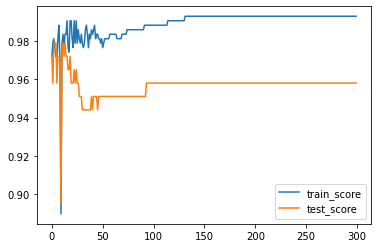

In [256]:
### 최적의 에포크 위치 확인하기 : 시각화
import matplotlib.pyplot as plt

plt.plot(train_score, label="train_score")
plt.plot(test_score, label="test_score")
plt.legend()
plt.show()

In [257]:
### 사용 클래스(모델) : SGDClassifier
from sklearn.linear_model import SGDClassifier

# 클래스(모델)생성
sc = SGDClassifier(loss="log", max_iter=10, random_state=42)

### 훈련모델 생성하기
sc.fit(train_scaled, train_target)

print("훈련 :", sc.score(train_scaled, train_target), "/", "테스트 :", sc.score(test_scaled, test_target))


훈련 : 0.9812206572769953 / 테스트 : 0.958041958041958


c:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


## 7. 결정트리

In [270]:
### 결정트리 패키지 불러들이기
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=6, random_state=42)

dt.fit(train_scaled, train_target)

print("훈련 :", dt.score(train_scaled, train_target), "/", "테스트 :", dt.score(test_scaled, test_target))


훈련 : 0.9976525821596244 / 테스트 : 0.951048951048951


In [267]:
print(dt.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.         0.70898365 0.         0.         0.         0.00683271
 0.         0.01301136 0.00158373 0.         0.         0.01734457
 0.         0.         0.06009867 0.11765325 0.02928303 0.0351676
 0.01004143 0.         0.         0.         0.         0.        ]


## 결론(해석)

In [260]:
"""
가. 유방암 양성/음성 여부 판단을 위한 모델을 위한
독립변수는 data에 있는 30개 모두 사용
종속변수는 target에 있는 음성 0, 양성 1을 기준으로 
훈련, 테스트 데이터를 구분하였다.

나. 앙상블 모델을 적용한 결과 훈련 정확도가 1이 나와 해당 모델은 적용하지 않았다.

<모델 적용 결과>
1. 히스토그램 기반 그레디언트 부스팅
훈련 : 1.0 / 테스트 : 0.9600820793433653
2. 그레디언트 부스팅
훈련 : 1.0 / 테스트 : 0.9506703146374831
3. 랜덤포레스트
훈련 : 1.0 / 테스트 : 0.9577291381668946
4. KNN(n_neighbors=7)
훈련 : 0.9671361502347418 / 테스트 : 0.958041958041958
5. ★로지스틱 회귀분석
훈련 : 0.9859154929577465 / 테스트 : 0.9790209790209791
6. 확률적경사하강법
훈련 : 0.9812206572769953 / 테스트 : 0.958041958041958
7. ★결정트리(max_depth=6)
훈련 : 0.9976525821596244 / 테스트 : 0.951048951048951

다. 따라서 모델 적용 결과 "로지스틱 회귀 모델"과 "결정트리 모델"을 선정할 수 있다.
1) 로지스틱 회귀모델 (0.0069)
훈련 : 0.9859154929577465 / 테스트 : 0.9790209790209791

2) 결정트리 모델 (0.0466)
훈련 : 0.9976525821596244 / 테스트 : 0.951048951048951

라. 훈련정확도와 테스트정확도의 편차가 가장 작으면서 훈련 정확도가 높은 모델인 "로지스틱 회귀 모델"을 통해서 
    유방암의 양성/음성을 판별할 수 있다.
""" 